In [ ]:
import numpy as np
import concurrent.futures  # for basic parallelism
import multiprocessing  # for advanced parallelism
from joblib import Parallel, delayed  # for parallel loops
import itertools  # for iterator algebra
import collections  # for additional data structures
import functools  # for higher-order functions
from itertools import combinations
from concurrent.futures import ProcessPoolExecutor
from joblib import Parallel, delayed

In [ ]:
from scipy.special import comb
from itertools import combinations
import numpy as np
from concurrent.futures import ThreadPoolExecutor
import concurrent.futures

Theorem 1 presents an extension of the Proportional-Value (PV) for nonnegative, monotonic cooperative games, accommodating the presence of null coalitions. These are groups of players that do not increase the value function $v$. It defines the maximum size of any null coalition as $k_{max}$.

For any player $i$, the set $K^{-i}$ includes null coalitions within the player set $D \setminus \{i\}$ with cardinality $k_{\text{max}} $. The theorem introduces a restricted value function $v_A$ for a subset $A$, defined as $v_A(B) = v(A \cup B)$. This allows the computation of values for coalitions within the context of a larger set $A$.

The Proportional-Value allocation $PV_0$ for each player considers these null coalitions and is defined such that it is continuous across nonnegative monotonic cooperative games and consistent with the traditional PV for positive games.


In [ ]:
# Set random seed
np.random.seed(42)
rho = 2
covMat = np.array([[np.power(np.pi/3, 2), 0, 0, 0],
                   [0, np.power(np.pi/3, 2), 0, 0],
                   [0, 0, np.power(np.pi/3, 2), 0],
                   [0, 0, 0, np.power(np.pi/3, 2)]])

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import energy_distance  # Import directly the function

def calculate_energy_distance(x, y):
    # Remove NaN values from both datasets
    x_clean = x.dropna()
    y_clean = y.dropna()

    # Calculate energy distance using clean datasets
    return energy_distance(x_clean, y_clean)

In [ ]:
import numpy as np

def jointSim(n, covMat):
    # Simulate n samples from a multivariate normal distribution
    return np.random.multivariate_normal(mean=np.zeros(4), cov=covMat, size=n)


In [ ]:
import numpy as np


def conditional_mvn(mean, cov, known_indices, known_values):
    def compute_conditional(mean, cov, known_indices, known_values):
        mean = np.array(mean)  # Convert mean to a numpy array if not already
        known_values = np.array(known_values).reshape(-1)

        if len(known_indices) == len(mean):
            return known_values
        elif len(known_indices) == 0:
            return np.random.multivariate_normal(mean=mean, cov=cov, size=1).flatten()

        unknown_indices = np.setdiff1d(np.arange(len(mean)), known_indices)
        sigma_known_known = cov[np.ix_(known_indices, known_indices)]
        sigma_known_unknown = cov[np.ix_(known_indices, unknown_indices)]
        sigma_unknown_known = cov[np.ix_(unknown_indices, known_indices)]
        sigma_unknown_unknown = cov[np.ix_(unknown_indices, unknown_indices)]

        mu_known = mean[known_indices]
        mu_unknown = mean[unknown_indices]

        diff = (known_values - mu_known).reshape(-1, 1)

        mu_cond = mu_unknown + np.dot(sigma_unknown_known, np.linalg.inv(sigma_known_known)).dot(diff).flatten()
        sigma_cond = sigma_unknown_unknown - np.dot(sigma_unknown_known, np.linalg.inv(sigma_known_known)).dot(sigma_known_unknown)

        return np.random.multivariate_normal(mu_cond, sigma_cond)

    return compute_conditional(mean, cov, known_indices, known_values)


# Specifying mean and covariance matrix as described
mean_python = [0, 0, 0]
cov_python = np.array([[1, 0.5, 0.2], [0.5, 1, 0.3], [0.2, 0.3, 1]])

# Specifying known indices and values
known_indices_python = [0, 1]
known_values_python = [1, 0.5]

# Running the Python conditional function
result_python_scenario = conditional_mvn(mean_python, cov_python, known_indices_python, known_values_python)

result_python_scenario

array([0.67296648])

In [ ]:
import numpy as np
import pandas as pd

def condSim(n, Sj, Sjc, xjc, covMat):
    import numpy as np
    import pandas as pd

    d = len(covMat)
    mean_vector = np.zeros(d)
    df_samples = pd.DataFrame(index=np.arange(n), columns=np.arange(d))

    for i in range(n):
        if len(Sjc) == d:
            df_samples.iloc[i, :] = xjc
        elif len(Sjc) > 0:
            xjc_array = np.array(xjc)
            simulated_values = conditional_mvn(mean_vector, covMat, Sjc, xjc_array)
            df_samples.iloc[i, Sjc] = xjc_array  # Assign known values
            if len(Sj) > 0:
                df_samples.iloc[i, Sj] = simulated_values  # Fill simulated values for Sj
        else:
            df_samples.iloc[i, :] = np.random.multivariate_normal(mean_vector, covMat)

    # Convert the DataFrame to a 2-D NumPy array
    numpy_array = df_samples.to_numpy()

    # Convert the NumPy array to a 2D list
    output_list = numpy_array.tolist()

    return output_list


In [ ]:
import numpy as np
import pandas as pd


# Define a 3x3 covariance matrix
covMat = np.array([[np.power(np.pi/3, 2), 0, 0, 0],
                   [0, np.power(np.pi/3, 2), 0, 0],
                   [0, 0, np.power(np.pi/3, 2), 0],
                   [0, 0, 0, np.power(np.pi/3, 2)]])

# Indices of known and unknown variables
Sjc = [0, 1]  # Known variable indices (e.g., first variable is known)
Sj = [2, 3]  # Unknown variable indices (e.g., second and third variables are unknown)

# Known values for the known variables
xjc = [0.5, -0.2]  # Known value for the first variable

# Number of simulations
n = 5  # Generate 5 simulations

# Run the condSim function
simulated_values = condSim(n, Sj, Sjc, xjc, covMat)

# Print the simulated values
print("Simulated Values:")
for row in simulated_values:
    print(row)


Simulated Values:
[0.5, -0.2, -0.14479003760437345, 0.6782578510371494]
[0.5, -0.2, 1.59491313602979, -0.24520484061469672]
[0.5, -0.2, -0.24518764796180506, 1.6537477932176246]
[0.5, -0.2, 0.8036557690721502, -0.49163242730060824]
[0.5, -0.2, 0.5681675490203415, -0.4852898730943876]


In [ ]:
import numpy as np
import pandas as pd

def ishigami_mod(X):
    """
    Calculate the Ishigami function for a given set of inputs.

    Parameters:
    - X: A DataFrame or 2D array where each row is a set of inputs (X1, X2, X3, ...).
         Only the first three columns are used in the computation.

    Returns:
    - Y: The output of the Ishigami function for each input set.
    """
    # Ensure X is a DataFrame for easy columnwise operations
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)

    # Apply the Ishigami function component-wise
    Y1 = np.sin(X.iloc[:, 0])
    Y2 = 7 * np.sin(X.iloc[:, 1])**2 if X.shape[1] >= 2 else 0
    Y3 = 0.1 * X.iloc[:, 2]**4 * np.sin(X.iloc[:, 0]) if X.shape[1] >= 3 else 0
    Y = Y1 + Y2 + Y3

    return Y

In [ ]:
import numpy as np

def ishigami_mod(X):
    """
    Calculate the Ishigami function for a given set of inputs.

    Parameters:
    - X: A 2D array where each row is a set of inputs (X1, X2, X3, ...).
         Only the first three columns are used in the computation.

    Returns:
    - Y: The output of the Ishigami function for each input set.
    """
    # Convert input to numpy array if it's not already one
    X = np.asarray(X)

    # Calculate each component of the Ishigami function
    Y1 = np.sin(X[:, 0])
    Y2 = 7 * np.sin(X[:, 1])**2 if X.shape[1] >= 2 else 0
    Y3 = 0.1 * X[:, 2]**4 * np.sin(X[:, 0]) if X.shape[1] >= 3 else 0

    # Calculate the final output
    Y = Y1 + Y2 + Y3

    return Y


In [ ]:
!pip install copulas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 1.8 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.10/dist-packages/copulas/multivariate/vine.py:73: UserWarning: Vines have not been fully tested on Python >= 3.8 and might produce wrong results.
  warnings.warn(


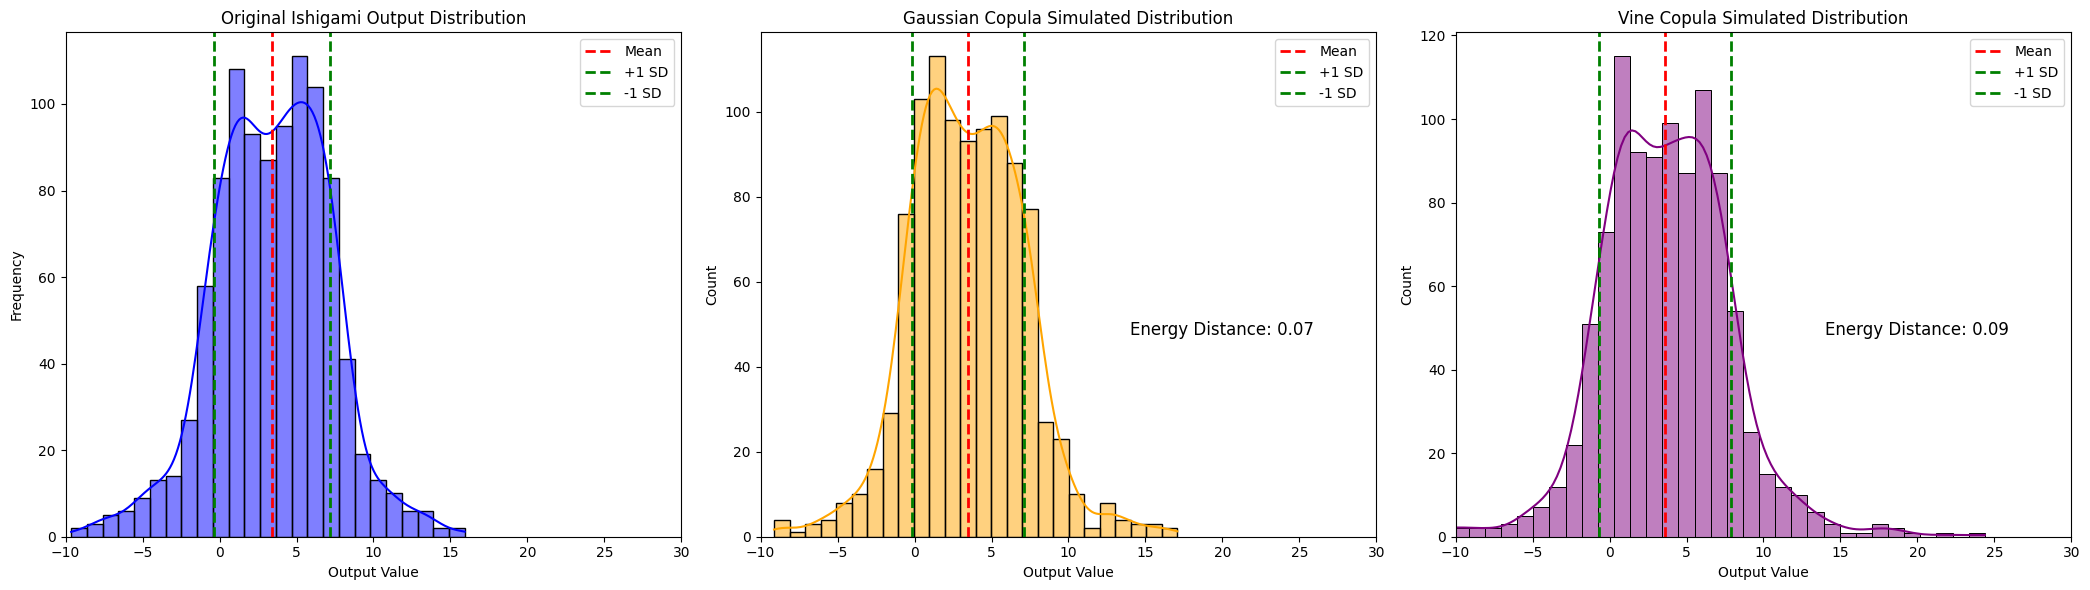

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import energy_distance
from copulas.multivariate import GaussianMultivariate, VineCopula



# Generate synthetic data
np.random.seed(42)
n_samples = 1000
data = pd.DataFrame({
    'x1': np.random.uniform(-np.pi, np.pi, n_samples),
    'x2': np.random.uniform(-np.pi, np.pi, n_samples),
    'x3': np.random.uniform(-np.pi, np.pi, n_samples)
})

# Calculate output from the Ishigami function
output = ishigami_mod(data)

# Fit Gaussian and Vine Copulas
gaussian_copula = GaussianMultivariate()
gaussian_copula.fit(data)

vine_copula = VineCopula('center')
vine_copula.fit(data)

# Generate simulated data
simulated_data_gaussian = gaussian_copula.sample(n_samples)
simulated_data_vine = vine_copula.sample(n_samples)

simulated_output_gaussian = ishigami_mod(simulated_data_gaussian)
simulated_output_vine = ishigami_mod(simulated_data_vine)

# Calculate energy distances
energy_dist_gaussian = energy_distance(output, simulated_output_gaussian)
energy_dist_vine = energy_distance(output, simulated_output_vine)

# Plotting settings
global_x_min = -10
global_x_max = 30

original_mean = output.mean()
original_std = output.std()
simulated_mean_gaussian = simulated_output_gaussian.mean()
simulated_std_gaussian = simulated_output_gaussian.std()
simulated_mean_vine = simulated_output_vine.mean()
simulated_std_vine = simulated_output_vine.std()

plt.figure(figsize=(21, 6))

# Original Data
plt.subplot(1, 3, 1)
sns.histplot(output, color='blue', kde=True)
plt.axvline(original_mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(original_mean + original_std, color='green', linestyle='dashed', linewidth=2, label='+1 SD')
plt.axvline(original_mean - original_std, color='green', linestyle='dashed', linewidth=2, label='-1 SD')
plt.xlim(global_x_min, global_x_max)
plt.title('Original Ishigami Output Distribution')
plt.xlabel('Output Value')
plt.ylabel('Frequency')
plt.legend()

# Gaussian Copula Simulated Data
plt.subplot(1, 3, 2)
sns.histplot(simulated_output_gaussian, color='orange', kde=True)
plt.axvline(simulated_mean_gaussian, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(simulated_mean_gaussian + simulated_std_gaussian, color='green', linestyle='dashed', linewidth=2, label='+1 SD')
plt.axvline(simulated_mean_gaussian - simulated_std_gaussian, color='green', linestyle='dashed', linewidth=2, label='-1 SD')
plt.annotate(f'Energy Distance: {energy_dist_gaussian:.2f}', xy=(0.6, 0.4), xycoords='axes fraction', fontsize=12, color='black')
plt.xlim(global_x_min, global_x_max)
plt.title('Gaussian Copula Simulated Distribution')
plt.xlabel('Output Value')
plt.legend()

# Vine Copula Simulated Data
plt.subplot(1, 3, 3)
sns.histplot(simulated_output_vine, color='purple', kde=True)
plt.axvline(simulated_mean_vine, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(simulated_mean_vine + simulated_std_vine, color='green', linestyle='dashed', linewidth=2, label='+1 SD')
plt.axvline(simulated_mean_vine - simulated_std_vine, color='green', linestyle='dashed', linewidth=2, label='-1 SD')
plt.annotate(f'Energy Distance: {energy_dist_vine:.2f}', xy=(0.6, 0.4), xycoords='axes fraction', fontsize=12, color='black')
plt.xlim(global_x_min, global_x_max)
plt.title('Vine Copula Simulated Distribution')
plt.xlabel('Output Value')
plt.legend()

plt.tight_layout()
plt.savefig('Ishigami_output.png', dpi=300, format='png', bbox_inches='tight')
plt.show()


In [ ]:
# models.py
import numpy as np
import pandas as pd

def borehole_function(X):
    """
    Calculate the borehole function for a given set of inputs.

    Parameters:
    - X: A DataFrame or 2D array where each row is a set of inputs (rw, r, Tu, Hu, Tl, Hl, L, Kw).
         Each parameter corresponds to a physical property affecting the water flow through a borehole.

    Returns:
    - Q: The output flow rate through the borehole for each input set.
    """
    # Ensure X is a DataFrame for easy columnwise operations
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X, columns=['rw', 'r', 'Tu', 'Hu', 'Tl', 'Hl', 'L', 'Kw'])

    # Apply the Borehole function formula
    log_term = np.log(X['r'] / X['rw'])
    Q = (2 * np.pi * X['Tu'] * (X['Hu'] - X['Hl'])) / (
        log_term * (1 + (2 * X['L'] * X['Tu']) / (log_term * X['rw']**2 * X['Kw']) + X['Tu'] / X['Tl'])
    )

    return Q


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import energy_distance
from copulas.multivariate import GaussianMultivariate, VineCopula

# Define the 100D function
def hundred_d_function(X):
    d = X.shape[1]
    indices = np.arange(1, d + 1)
    term1 = -5 / d * np.sum(indices * X, axis=1)
    term2 = 1 / d * np.sum(indices * X**3, axis=1)
    term3 = 1 / (3 * d) * np.sum(indices * np.log(X**2 + X**4), axis=1)
    interactions = X[:, 0]*X[:, 1]**2 + X[:, 1]*X[:, 3] - X[:, 2]*X[:, 4] + X[:, 50] + X[:, 49]*X[:, 53]**2
    return 3 + term1 + term2 + term3 + interactions

# Generating input data
n_samples = 1000
X = np.random.uniform(1, 2, (n_samples, 100))
X[:, 19] = np.random.uniform(1, 3, n_samples)  # Different range for X_20

# Convert to DataFrame for consistency with previous examples
data = pd.DataFrame(X)

# Fit Gaussian and Vine Copulas
gaussian_copula = GaussianMultivariate()
gaussian_copula.fit(data)

vine_copula = VineCopula('center')
vine_copula.fit(data)

# Sample from both copulas
simulated_data_gaussian = gaussian_copula.sample(n_samples)

# Calculate outputs using the 100D function
output = hundred_d_function(data.values)
simulated_output_gaussian = hundred_d_function(simulated_data_gaussian.values)

# Calculate energy distances
energy_dist_gaussian = energy_distance(output, simulated_output_gaussian)




/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3

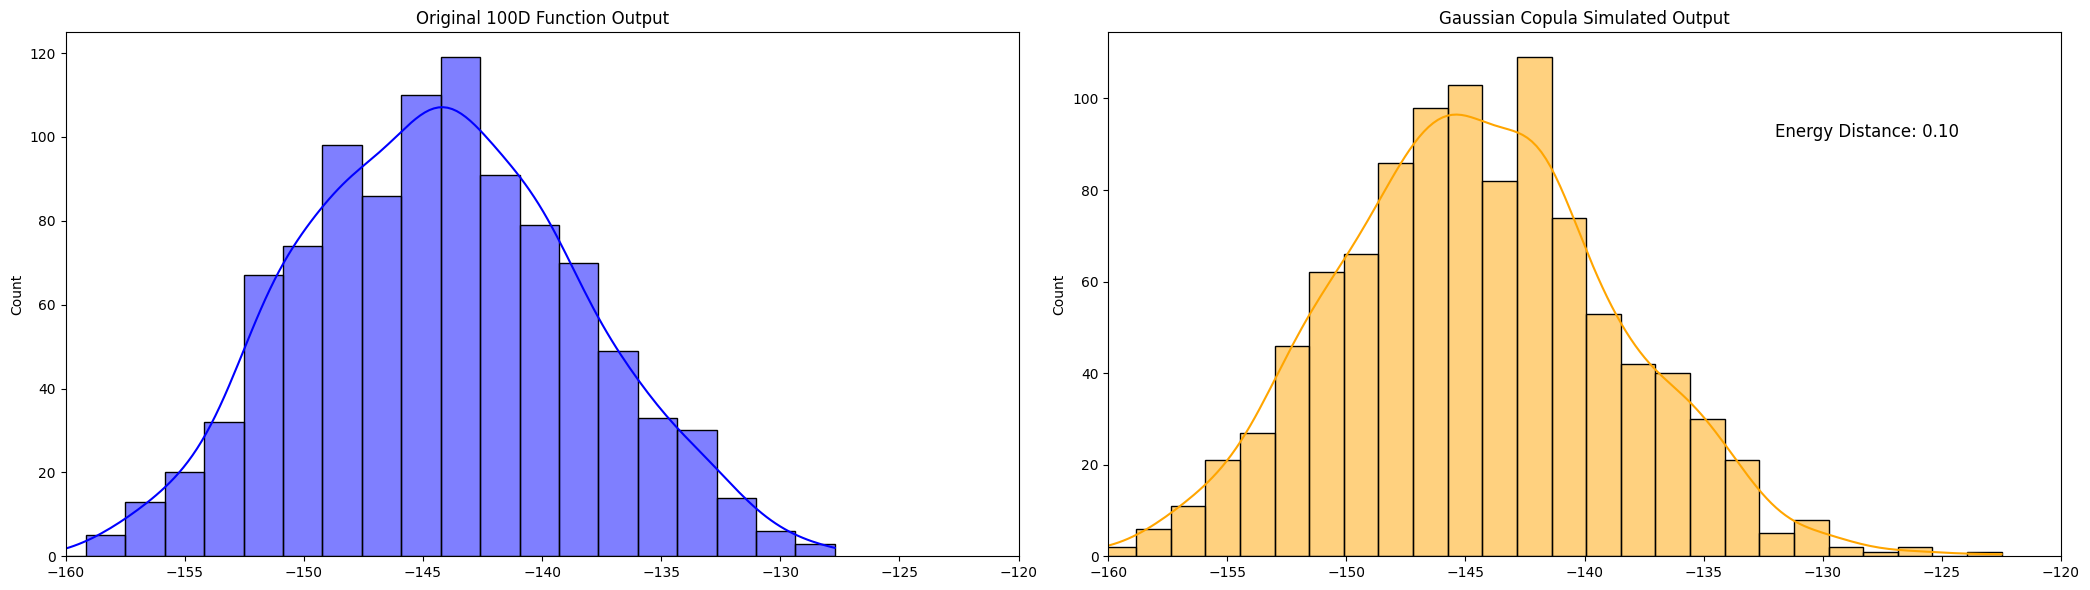

In [ ]:
# Plotting
global_x_min = -160
global_x_max = -120

plt.figure(figsize=(21, 6))

# Original Data
plt.subplot(1, 2, 1)
sns.histplot(output, color='blue', kde=True)
plt.title('Original 100D Function Output')
plt.xlim(global_x_min, global_x_max)

# Gaussian Copula Simulated Data
plt.subplot(1, 2, 2)
sns.histplot(simulated_output_gaussian, color='orange', kde=True)
plt.title('Gaussian Copula Simulated Output')
plt.annotate(f'Energy Distance: {energy_dist_gaussian:.2f}', xy=(0.7, 0.8), xycoords='axes fraction', fontsize=12)
plt.xlim(global_x_min, global_x_max)



plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd

def simulate_piston_cycle_time(n):
    """
    Simulate the piston cycle time for n samples.

    Parameters:
    - n: Number of samples to simulate

    Returns:
    - DataFrame with the parameters and the cycle times
    """
    np.random.seed(0)  # For reproducibility

    # Assuming distributions based on the provided ranges and typical values
    M = np.random.uniform(30, 60, n)  # Piston weight in KG
    S = np.random.uniform(0.005, 0.020, n)  # Piston surface area in m^2
    K = np.random.uniform(1000, 5000, n)  # Spring coefficient in N/m
    Ta = np.random.uniform(290, 296, n)  # Ambient temperature in K
    P0 = np.random.uniform(90000, 110000, n)  # Atmospheric pressure in N/m^2
    V0 = np.random.uniform(0.002, 0.010, n)  # Initial gas volume in m^3
    T0 = np.random.uniform(340, 360, n)  # Filling gas temperature in K

    # Calculate intermediate values A and V
    A = P0 * S + 19.62 * M - (K * V0) / S
    V = (S / (2 * K)) * (np.sqrt(A**2 + 4 * K * ((P0 * V0 * Ta) / T0)) - A)

    # Calculate cycle time y
    seconds = 2 * np.pi * np.sqrt(M / (K + S**2 * ((P0 * V0) / T0) * (Ta / V**2)))

    # Return a DataFrame with all variables and cycle times
    df = pd.DataFrame({
        'M': M,
        'S': S,
        'V0': V0,
        'K': K,
        'P0': P0,
        'Ta': Ta,
        'T0': T0,
        'seconds': seconds
    })

    return df

# Example of simulating 1000 piston cycles
output = simulate_piston_cycle_time(1000)
print(output.head())


           M         S        V0            K             P0          Ta  \
0  46.464405  0.013893  0.004934  4246.073882   95852.840995  292.483775   
1  51.455681  0.005151  0.004381  2904.335944  101330.365485  293.777710   
2  48.082901  0.012137  0.002549  3092.623960   92748.288528  294.671506   
3  46.346495  0.015632  0.004820  2002.082346   96994.243695  295.109347   
4  42.709644  0.005660  0.003858  3420.172067   91064.327583  294.898476   

           T0   seconds  
0  347.495871  0.396517  
1  348.573720  0.702348  
2  353.661132  0.316869  
3  352.018956  0.361337  
4  341.409660  0.594262  


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Fit Gaussian and Vine Copulas
# gaussian_copula = GaussianMultivariate()
# gaussian_copula.fit(data)

# vine_copula = VineCopula('center')
# vine_copula.fit(data)

# # Generate simulated data
# simulated_data_gaussian = gaussian_copula.sample(n_samples)
# simulated_data_vine = vine_copula.sample(n_samples)


# # Calculate energy distances
# energy_dist_gaussian = energy_distance(output, simulated_data_gaussian)
# energy_dist_vine = energy_distance(output, simulated_data_vine)

# # Plotting settings
# global_x_min = -10
# global_x_max = 30

# # Plotting
# plt.figure(figsize=(21, 6))

# # Original Data
# plt.subplot(1, 3, 1)
# sns.histplot(output, color='blue', kde=True, label='Original Data')
# plt.axvline(original_mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
# plt.axvline(original_mean + original_std, color='green', linestyle='dashed', linewidth=2, label='+1 SD')
# plt.axvline(original_mean - original_std, color='green', linestyle='dashed', linewidth=2, label='-1 SD')
# plt.title('Original Borehole Output Distribution')
# plt.xlabel('Flow Rate')
# plt.ylabel('Frequency')
# plt.legend()

# # Simulated Data from Gaussian Copula
# plt.subplot(1, 3, 2)
# sns.histplot(simulated_output_gaussian, color='orange', kde=True, label='Gaussian Simulated')
# plt.axvline(simulated_mean_gaussian, color='red', linestyle='dashed', linewidth=2, label='Mean')
# plt.axvline(simulated_mean_gaussian + simulated_std_gaussian, color='green', linestyle='dashed', linewidth=2, label='+1 SD')
# plt.axvline(simulated_mean_gaussian - simulated_std_gaussian, color='green', linestyle='dashed', linewidth=2, label='-1 SD')
# plt.annotate(f'Energy Distance: {energy_dist_gaussian:.2f}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, color='black')
# plt.title('Gaussian Copula Simulated Distribution')
# plt.xlabel('Flow Rate')
# plt.legend()

# # Simulated Data from Vine Copula
# plt.subplot(1, 3, 3)
# sns.histplot(simulated_output_vine, color='purple', kde=True, label='Vine Simulated')
# plt.axvline(simulated_mean_vine, color='red', linestyle='dashed', linewidth=2, label='Mean')
# plt.axvline(simulated_mean_vine + simulated_std_vine, color='green', linestyle='dashed', linewidth=2, label='+1 SD')
# plt.axvline(simulated_mean_vine - simulated_std_vine, color='green', linestyle='dashed', linewidth=2, label='-1 SD')
# plt.annotate(f'Energy Distance: {energy_dist_vine:.2f}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, color='black')
# plt.title('Vine Copula Simulated Distribution')
# plt.xlabel('Flow Rate')
# plt.legend()

# plt.tight_layout()
# plt.show()


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm, uniform

In [ ]:
import numpy as np
from copulas.multivariate import GaussianMultivariate
from copulas.visualization import scatter_2d
from scipy.stats import norm, uniform
import pandas as pd

np.random.seed(42)

# Define the number of samples
n_samples = 1000

# Define marginal distributions
rw_samples = norm(loc=0.10, scale=0.01).rvs(n_samples)  # Normal distribution for borehole radius
Tu_samples = uniform(loc=63070, scale=(115600 - 63070)).rvs(n_samples)  # Uniform distribution for transmissivity

# Combine samples into a DataFrame
data = pd.DataFrame({
    'rw': rw_samples,
    'Tu': Tu_samples
})

# Initialize and fit a Gaussian copula to the data
copula = GaussianMultivariate()
copula.fit(data)

# Generate synthetic data from the copula
synthetic_data = copula.sample(n_samples)

print("Synthetic Data Head:")
print(synthetic_data.head())


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)


Synthetic Data Head:
         rw             Tu
0  0.107507   83430.817072
1  0.088443  102674.733045
2  0.113005  111134.409536
3  0.096425  100538.476931
4  0.103834   76789.816123


<ipython-input-20-c620cad39a70>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['rw'], color='blue', shade=True, label='Original Data', alpha=0.5)
<ipython-input-20-c620cad39a70>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_data['rw'], color='green', shade=True, label='Synthetic Data', alpha=0.5)
<ipython-input-20-c620cad39a70>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Tu'], color='blue', shade=True, label='Original Data', alpha=0.5)
<ipython-input-20-c620cad39a70>:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seabo

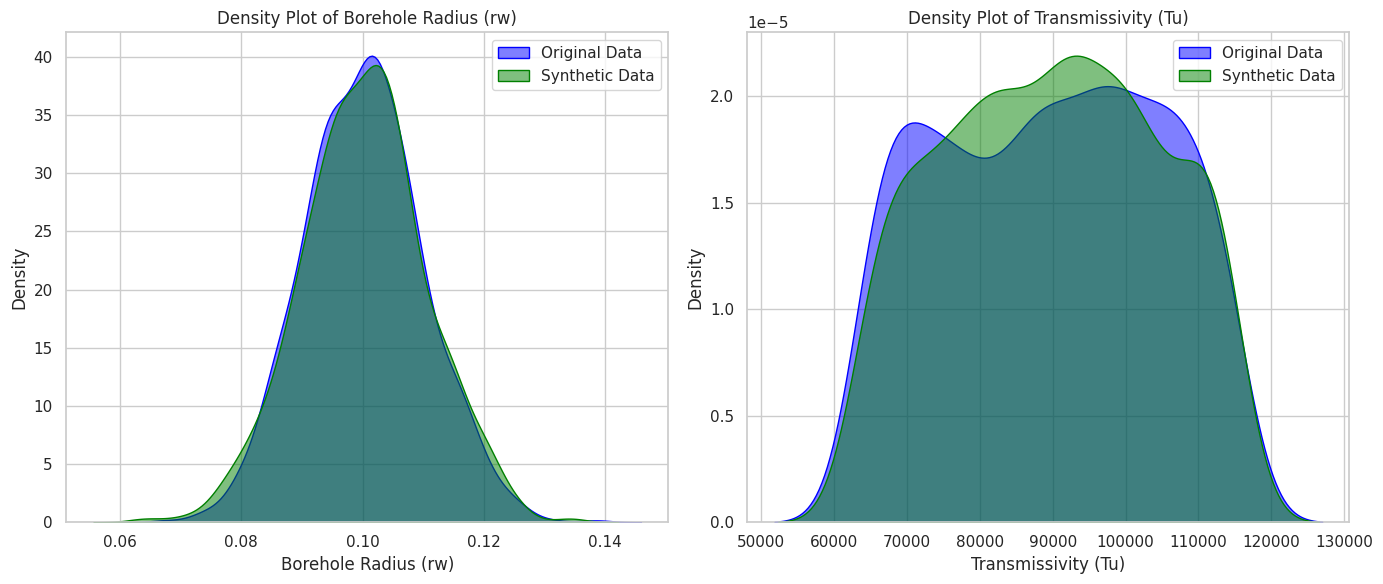

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set(style='whitegrid')

plt.figure(figsize=(14, 6))

# Density Plot for 'rw'
plt.subplot(1, 2, 1)
sns.kdeplot(data['rw'], color='blue', shade=True, label='Original Data', alpha=0.5)
sns.kdeplot(synthetic_data['rw'], color='green', shade=True, label='Synthetic Data', alpha=0.5)
plt.title('Density Plot of Borehole Radius (rw)')
plt.xlabel('Borehole Radius (rw)')
plt.legend()

# Density Plot for 'Tu'
plt.subplot(1, 2, 2)
sns.kdeplot(data['Tu'], color='blue', shade=True, label='Original Data', alpha=0.5)
sns.kdeplot(synthetic_data['Tu'], color='green', shade=True, label='Synthetic Data', alpha=0.5)
plt.title('Density Plot of Transmissivity (Tu)')
plt.xlabel('Transmissivity (Tu)')
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)


<Figure size 2000x2000 with 0 Axes>

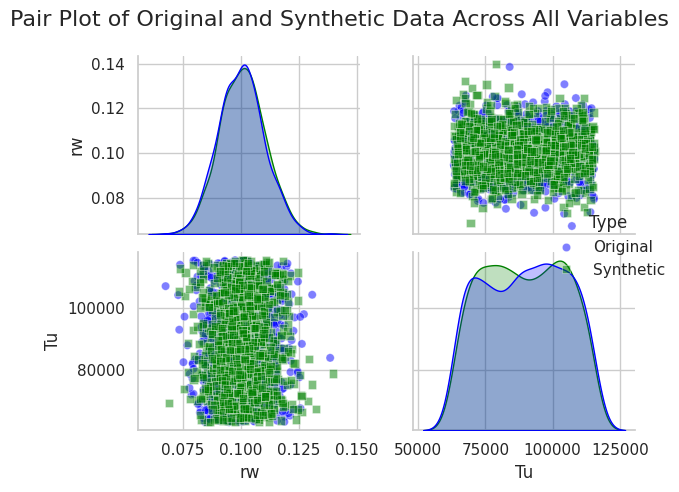

In [ ]:
# Initialize and fit a Gaussian copula to the data
copula = GaussianMultivariate()
copula.fit(data)

# Generate synthetic data from the copula
synthetic_data = copula.sample(n_samples)

# Combine both datasets into a single DataFrame for easier plotting
data['Type'] = 'Original'
synthetic_data['Type'] = 'Synthetic'
combined_data = pd.concat([data, synthetic_data])

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming combined_data contains all variables and a 'Type' column
# Set the style for better visibility
sns.set(style='whitegrid', context='notebook')

# Increase the figure size for better readability given the number of variables
plt.figure(figsize=(20, 20))  # Adjust size as needed to accommodate all plots

# Create the pair plot
pair_plot = sns.pairplot(combined_data, hue='Type', palette={'Original': 'blue', 'Synthetic': 'green'},
                         plot_kws={'alpha': 0.5}, markers=["o", "s"],
                         diag_kind='kde')  # Using KDE for diagonal plots enhances the visibility of distribution differences

# Set a super title for the plot
plt.suptitle('Pair Plot of Original and Synthetic Data Across All Variables', size=16, verticalalignment='top')

# Adjust layout for better spacing between plots to avoid label overlap
plt.tight_layout()

# Display the plot
plt.show()


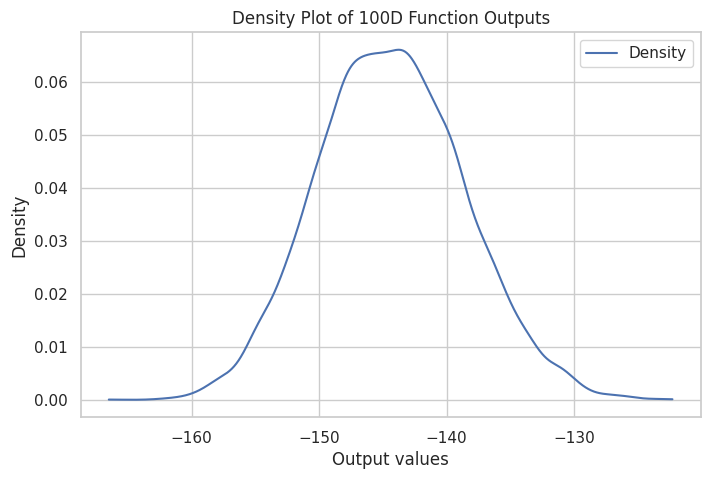

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def hundred_d_function(X):
    d = X.shape[1]
    indices = np.arange(1, d + 1)
    term1 = -5/d * np.sum(indices * X, axis=1)
    term2 = 1/d * np.sum(indices * X**3, axis=1)
    term3 = 1/(3*d) * np.sum(indices * np.log(X**2 + X**4), axis=1)
    interactions = X[:, 0]*X[:, 1]**2 + X[:, 1]*X[:, 3] - X[:, 2]*X[:, 4] + X[:, 50] + X[:, 49]*X[:, 53]**2

    return 3 + term1 + term2 + term3 + interactions

# Generating input data
n_samples = 10000
X = np.random.uniform(1, 2, (n_samples, 100))
X[:, 19] = np.random.uniform(1, 3, n_samples)  # Different range for X_20

# Compute outputs
outputs = hundred_d_function(X)

# Density estimation
kde = gaussian_kde(outputs)
x_range = np.linspace(min(outputs), max(outputs), 1000)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(x_range, kde(x_range), label='Density')
plt.title('Density Plot of 100D Function Outputs')
plt.xlabel('Output values')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
import numpy as np

def estim_VE_MC(condX, condSim, model, subset, Ni, vy, covMat):
    condX = np.asarray(condX)
    No, d = condX.shape

    # Adjust subset indices to match the R function logic
    complement_subset = np.setdiff1d(np.arange(d), subset)

    varVec = np.zeros(No)
    for i in range(No):
        # Extract conditional values for each sample, ensuring xjc matches the expected shape
        xjc = condX[i, complement_subset]  # Direct indexing without further adjustment

        # Perform conditional simulation
        # Ensure the condSim function is designed to accept these parameters correctly
        X_ = condSim(Ni, subset, complement_subset, xjc, covMat)  # Adjusted order to match the function definition

        # Apply the model function
        Y_ = model(X_)
        varVec[i] = np.var(Y_, ddof=1)  # ddof=1 for sample variance

    return np.mean(varVec) / vy

In [ ]:
def compute_variance_np(model, jointSim, Nv, covMat, pert=False):
    X_v = jointSim(Nv, covMat)  # Generate samples using the joint simulation function

    # Sequential execution of the model on generated samples
    Y = model(X_v)

    # Compute the variance of the model output, using ddof=1 for sample variance
    vy = np.var(Y, ddof=1)
    return vy, X_v


In [ ]:
from itertools import combinations
import scipy.special
import numpy as np

def conditional_elements_estimation_np(model, condSim, jointSim, No, Ni, d, vy, covMat):
    # Generate conditional samples
    condX = jointSim(No, covMat)

    # Initialize indices and combination weights
    indices = [None] * (d + 1)
    comb_weights = np.zeros(d)

    # Use NumPy to create combinations and store indices for each interaction level
    for j in range(1, d + 1):
        indices[j] = np.array(list(combinations(range(d), j))).T
        comb_weights[j-1] = 1 / scipy.special.comb(d - 1, j - 1)

    # Initialize storage for variance explained results, mirroring the structure of indices
    VEs = [None] * len(indices)

    # Estimate variance explained for each subset of variables
    for level in range(1, len(indices)):
        current_level_indices = indices[level]
        current_level_VEs = []  # Initialize an empty list to store VEs for the current level
        for subset in current_level_indices.T:
            VE = estim_VE_MC(condX, condSim, model, list(subset), Ni, vy, covMat)
            current_level_VEs.append(VE)
        VEs[level] = np.array(current_level_VEs)  # Store the VEs for the current level

    # Set the last element of VEs to 1, representing the total variance explained for the full model
    VEs[-1] = 1

    # Convert combination weights to a NumPy array for consistency
    comb_weights_array = np.array(comb_weights)

    # Return the estimated VEs, indices, and combination weights
    return VEs, indices, comb_weights_array


In [ ]:
# Set up simulation parameters
Nv = 1000  # Number of samples for variance estimation
No = 200  # Number of samples for conditional expectation
Ni = 1000 # Number of inner loop samples for Monte Carlo estimation
d = 4    # Dimensionality based on the covariance matrix setup

covMat = np.array([[np.power(np.pi/3, 2), 0, 0, 0],
                   [0, np.power(np.pi/3, 2), 0, 0],
                   [0, 0, np.power(np.pi/3, 2), 0],
                   [0, 0, 0, np.power(np.pi/3, 2)]])

# Compute the variance
vy, X_v = compute_variance_np(ishigami_mod, jointSim, Nv, covMat=covMat, pert=False)

# Calculate conditional elements
VEs, indices, comb_weights = conditional_elements_estimation_np(
    model=ishigami_mod,
    condSim=condSim,
    jointSim=jointSim,
    No=No,
    Ni=Ni,
    d=d,
    vy=vy,
    covMat=covMat
)



In [ ]:
VEs, indices, comb_weights

([None,
  array([1.22329652e-01, 8.00115808e-01, 8.26221884e-02, 1.70007114e-31]),
  array([0.91961386, 0.18676163, 0.12226045, 0.87823458, 0.79862605,
         0.07768012]),
  array([0.99575569, 0.92143016, 0.2001471 , 0.87646481]),
  1],
 [None,
  array([[0, 1, 2, 3]]),
  array([[0, 0, 0, 1, 1, 2],
         [1, 2, 3, 2, 3, 3]]),
  array([[0, 0, 0, 1],
         [1, 1, 2, 2],
         [2, 3, 3, 3]]),
  array([[0],
         [1],
         [2],
         [3]])],
 array([1.        , 0.33333333, 0.33333333, 1.        ]))

In [ ]:
# Old
import numpy as np

def recur_PV(indices, VEs):
    d = len(indices) - 1
    Ps = [None] * (d + 1)
    Ps[1] = np.array(VEs[1])  # Initialize the first order directly from VEs

    for ord in range(2, d + 1):
        Ws = np.array(VEs[ord]) if isinstance(VEs[ord], np.ndarray) else np.array([VEs[ord]])
        current_indices = indices[ord]

        if current_indices.size == 0:  # Check if current_indices is empty
            Ps[ord] = np.array([])  # Assign an empty array to Ps[ord]
            continue  # Skip the current loop iteration if there are no indices to process

        previous_indices = indices[ord - 1]
        results = np.zeros(len(Ws))

        for i in range(current_indices.shape[1]):  # Now safe to use shape[1] because we checked size
            S = set(current_indices[:, i])
            idx_Spi = []

            for j in range(previous_indices.shape[1]):
                prev_set = set(previous_indices[:, j])
                if prev_set.issubset(S) and len(prev_set) + 1 == len(S):
                    idx_Spi.append(j)

            if idx_Spi:
                denom = sum(1 / Ps[ord - 1][j] for j in idx_Spi if Ps[ord - 1][j] != 0)
                results[i] = Ws[i] / denom if denom > 0 else 0

        Ps[ord] = results

    return Ps


# Calculate partial variances
partial_variances = recur_PV(indices, VEs)
print("Partial Variances:", partial_variances)

Partial Variances: [None, array([1.22329652e-01, 8.00115808e-01, 8.26221884e-02, 1.70007114e-31]), array([9.75774359e-02, 9.21009840e-03, 2.07851460e-32, 6.57700627e-02,
       1.35772111e-31, 1.32061724e-32]), array([7.42939199e-03, 1.66093590e-32, 1.61626042e-33, 1.05487026e-32]), array([1.29246126e-33])]


In [ ]:
def calculate_shapley_effects(d, indices, VEs, comb_weights):
    Shaps = np.zeros(d)
    for var_j in range(d):
        for ord in range(d):
            if VEs[ord] is None or VEs[ord + 1] is None:
                continue

            idx_j = np.where(indices[ord + 1] == var_j)[1]
            idx_woj = np.where(np.all(indices[ord] != var_j, axis=0))[0]

            # Handling different types in VEs
            if isinstance(VEs[ord + 1], (np.ndarray, list)):
                effect_incl_j = np.sum([VEs[ord + 1][i] for i in idx_j])
            else:  # If it's an integer
                effect_incl_j = VEs[ord + 1]

            if isinstance(VEs[ord], (np.ndarray, list)):
                effect_excl_j = np.sum([VEs[ord][i] for i in idx_woj])
            else:  # If it's an integer
                effect_excl_j = VEs[ord]

            # Ensure both are numbers before subtraction
            if isinstance(effect_incl_j, (int, float)) and isinstance(effect_excl_j, (int, float)):
                total_incremental = effect_incl_j - effect_excl_j
            else:
                total_incremental = 0  # Default to 0 if types are not compatible

            Shaps[var_j] += comb_weights[ord] * total_incremental

    Shaps /= d
    return Shaps

In [ ]:
Shaps = calculate_shapley_effects(d, indices, VEs, comb_weights)
print("Shapley Values:", Shaps)

Shapley Values: [0.08994131 0.59983582 0.0573173  0.00163866]


In [ ]:
import numpy as np

def identify_zero_players_np(indices, VEs, tol=None):
    """
    Identifies inputs with zero or negligible total Sobol indices (zero players) using a numpy-centric approach.

    Parameters:
    - indices: A list of numpy arrays, where each array represents a set of input indices for each order of interaction.
    - VEs: A list where each element is a numpy array representing variance explained (VEs) for each set of inputs.
           Elements of VEs are converted to numpy arrays if not already.
    - tol: A tolerance level below which variance contributions are considered negligible. If None, exact zeros are considered.

    Returns:
    - A numpy array of input indices considered as zero players, adjusted for 0-based indexing.
    """
    # Convert the first element of VEs to a numpy array if it's not already one
    VEs_1 = np.asarray(VEs[1])

    # Perform the comparison with tol
    if tol is not None:
        idx_z = np.where(VEs_1 <= tol)[0]
    else:
        idx_z = np.where(VEs_1 == 0)[0]

    return idx_z

In [ ]:
# Example usage
tolerance = 0.1
idx_z_np = identify_zero_players_np(indices, VEs, tol=tolerance)
print("Identified zero players:", idx_z_np)

Identified zero players: [2 3]


In [ ]:
def find_zero_coalitions_np(VEs, tol=0.1):
    """
    Identifies coalitions of inputs with zero or negligible variance contributions.

    Parameters:
    - VEs: A list of numpy arrays where each array represents variance explained (VEs)
           for each set of inputs at different interaction orders. The first element can be None.
    - tol: A tolerance level below which variance contributions are considered negligible.
           If tol is None, exact zeros are considered.

    Returns:
    - A numpy array of indices representing the orders of coalitions with zero or negligible
      variance contributions, adjusted for Python's 0-based indexing.
    """
    Z_coal_order = []

    # Iterate over each set of variance effects, starting from the first element
    for i, ve in enumerate(VEs):
        if ve is not None:  # Skip None elements
            # Check if any variance contributions meet the specified criteria
            if tol is None:
                zero_criteria_met = np.any(ve == 0)
            else:
                zero_criteria_met = np.any(ve <= tol)

            # If the criteria are met, append the index (adjusted for 0-based indexing in Python)
            if zero_criteria_met:
                Z_coal_order.append(i)

    return np.array(Z_coal_order, dtype=int)

In [ ]:
tolerance = 0.1
Z_coal_order_np = find_zero_coalitions_np(VEs, tolerance)
print(f"Zero players (indices): {Z_coal_order_np}")


Zero players (indices): [1 2]


In [ ]:

Z_cardMax = max(Z_coal_order_np) - 1

print(f"Z_cardMax: {Z_cardMax}")

if tolerance is None:
    Z_coal_cardMax = indices[Z_cardMax + 1][:, np.where(VEs[Z_cardMax + 1] == 0)[0]]
else:
    Z_coal_cardMax = indices[Z_cardMax + 1][:, np.where(VEs[Z_cardMax + 1] <= tolerance)[0]]

print("Z.coal.cardMax:")
print(Z_coal_cardMax)

z_zeroPV = np.array([np.all(np.isin(Z_coal_cardMax, z).sum(axis=0) == Z_cardMax + 1) for z in idx_z_np])
print("z.zeroPV:")
print(z_zeroPV)

PV = np.zeros(d)
print("Initial PV:", PV)

if Z_cardMax == d:
    print("Z_cardMax is equal to d, returning PV.")
else:
    PS_i = np.zeros(d)
    PS_N = np.zeros(d)

    for idx_Zcoal in range(Z_coal_cardMax.shape[1]):
        Z_coal = Z_coal_cardMax[:, idx_Zcoal]
        print(f"Processing Z_coal column {idx_Zcoal}: {Z_coal}")

        indices_ = [np.zeros((d - Z_cardMax - 1, 0))] * (d - Z_cardMax)
        VEs_ = [np.zeros(0)] * (d - Z_cardMax)

        for i in range(1, d - Z_cardMax):
            checkmat = np.isin(indices[i], Z_coal).reshape(i, -1)
            print(f"checkmat for i={i}: {checkmat}")
            idx_ind_null = np.where(np.sum(checkmat, axis=0) == 0)[0]
            print(f"idx_ind_null for i={i}: {idx_ind_null}")
            ind_tmp = indices[i][:, idx_ind_null]
            print(f"ind_tmp for i={i}: {ind_tmp}")
            indices_[i] = np.vstack((ind_tmp, np.tile(Z_coal, (ind_tmp.shape[1], 1)).T))
            print(f"indices_[{i}]: {indices_[i]}")

        for i in range(1, len(indices_)):
            print(f"Processing indices_[{i}]")
            print(f"Z_cardMax + i: {Z_cardMax + i}")
            if Z_cardMax + i >= len(indices):
                print(f"Skipping index {Z_cardMax + i} because it is out of range.")
                continue
            idx_get = []
            for x in indices_[i].T:
                matches = np.where(np.all(np.isin(indices[Z_cardMax + i], x).reshape(Z_cardMax + i, -1), axis=0))[0]
                if matches.size > 0:
                    idx_get.append(matches[0])
                else:
                    print(f"No match found for x={x} in indices[{Z_cardMax + i}]")
            print(f"idx_get for i={i}: {idx_get}")
            if idx_get:
                idx_get = np.array(idx_get)
                if idx_get.max() < len(VEs[Z_cardMax + i]):
                    VEs_[i] = VEs[Z_cardMax + i][idx_get]
                    print(f"VEs_[{i}]: {VEs_[i]}")
                else:
                    print(f"Skipping VEs_[{i}] due to out-of-range indices.")
            else:
                print(f"Skipping VEs_[{i}] due to no matches.")

        # Calculate partial variance contributions
        PS = recur_PV(indices_, VEs_)
        print(f"PS after recur_pv: {PS}")

        idx_var = indices_[1][0, :]
        PS_i[idx_var] += 1 / PS[-2][::-1]
        PS_N += 1 / PS[-1]

    PV = PS_i / PS_N if np.any(PS_N) else PV
    print("Final PV after recursive PME calculation:", PV)

print("Proportional Marginal Effects (PV):", PV)


Z_cardMax: 1
Z.coal.cardMax:
[[2]
 [3]]
z.zeroPV:
[False False]
Initial PV: [0. 0. 0. 0.]
Processing Z_coal column 0: [2 3]
checkmat for i=1: [[False False  True  True]]
idx_ind_null for i=1: [0 1]
ind_tmp for i=1: [[0 1]]
indices_[1]: [[0 1]
 [2 2]
 [3 3]]
checkmat for i=2: [[False False False False False  True]
 [False  True  True  True  True  True]]
idx_ind_null for i=2: [0]
ind_tmp for i=2: [[0]
 [1]]
indices_[2]: [[0]
 [1]
 [2]
 [3]]
Processing indices_[1]
Z_cardMax + i: 2
idx_get for i=1: [1, 3]
VEs_[1]: [0.18676163 0.87823458]
Processing indices_[2]
Z_cardMax + i: 3
idx_get for i=2: [0]
VEs_[2]: [0.99575569]
PS after recur_pv: [None, array([0.18676163, 0.87823458]), array([0.15335676])]
Final PV after recursive PME calculation: [0.17461936 0.82113633 0.         0.        ]
Proportional Marginal Effects (PV): [0.17461936 0.82113633 0.         0.        ]


In [ ]:
def calculate_pme_zero_players(d, indices, VEs, tolerance, idx_z, Z_coal_order):
    print("Initial parameters:")
    print("d:", d)
    print("indices:", indices)
    print("VEs:", VEs)
    print("tolerance:", tolerance)
    print("idx_z:", idx_z)
    print("Z_coal_order:", Z_coal_order)

    Z_cardMax = max(Z_coal_order) - 1  # Adjust for 0-based indexing
    print(f"Z_cardMax: {Z_cardMax}")

    if tolerance is None:
        Z_coal_cardMax = indices[Z_cardMax + 1][:, np.where(VEs[Z_cardMax + 1] == 0)[0]]
    else:
        Z_coal_cardMax = indices[Z_cardMax + 1][:, np.where(VEs[Z_cardMax + 1] <= tolerance)[0]]

    print("Z.coal.cardMax:")
    print(Z_coal_cardMax)

    z_zeroPV = np.array([np.all(np.isin(Z_coal_cardMax, z).sum(axis=0) == Z_cardMax + 1) for z in idx_z])
    print("z.zeroPV:")
    print(z_zeroPV)

    PV = np.zeros(d)
    print("Initial PV:", PV)

    if Z_cardMax == d:
        print("Z_cardMax is equal to d, returning PV.")
        return PV
    else:
        PS_i = np.zeros(d)
        PS_N = np.zeros(d)

        for idx_Zcoal in range(Z_coal_cardMax.shape[1]):
            Z_coal = Z_coal_cardMax[:, idx_Zcoal]
            print(f"Processing Z_coal column {idx_Zcoal}: {Z_coal}")

            indices_ = [np.zeros((d - Z_cardMax - 1, 0))] * (d - Z_cardMax)
            VEs_ = [np.zeros(0)] * (d - Z_cardMax)

            for i in range(1, d - Z_cardMax):
                checkmat = np.isin(indices[i], Z_coal).reshape(i, -1)
                print(f"checkmat for i={i}: {checkmat}")
                idx_ind_null = np.where(np.sum(checkmat, axis=0) == 0)[0]
                print(f"idx_ind_null for i={i}: {idx_ind_null}")
                ind_tmp = indices[i][:, idx_ind_null]
                print(f"ind_tmp for i={i}: {ind_tmp}")
                indices_[i] = np.vstack((ind_tmp, np.tile(Z_coal, (ind_tmp.shape[1], 1)).T))
                print(f"indices_[{i}]: {indices_[i]}")

            for i in range(1, len(indices_)):
                print(f"Processing indices_[{i}]")
                print(f"Z_cardMax + i: {Z_cardMax + i}")
                if Z_cardMax + i >= len(indices):
                    print(f"Skipping index {Z_cardMax + i} because it is out of range.")
                    continue
                idx_get = []
                for x in indices_[i].T:
                    matches = np.where(np.all(np.isin(indices[Z_cardMax + i], x).reshape(Z_cardMax + i, -1), axis=0))[0]
                    if matches.size > 0:
                        idx_get.append(matches[0])
                    else:
                        print(f"No match found for x={x} in indices[{Z_cardMax + i}]")
                print(f"idx_get for i={i}: {idx_get}")
                if idx_get:
                    idx_get = np.array(idx_get)
                    if idx_get.max() < len(VEs[Z_cardMax + i]):
                        VEs_[i] = VEs[Z_cardMax + i][idx_get]
                        print(f"VEs_[{i}]: {VEs_[i]}")
                    else:
                        print(f"Skipping VEs_[{i}] due to out-of-range indices.")
                else:
                    print(f"Skipping VEs_[{i}] due to no matches.")

            # Calculate partial variance contributions
            PS = recur_pv(indices_, VEs_)
            print(f"PS after recur_pv: {PS}")

            idx_var = indices_[1][0, :]
            PS_i[idx_var] += 1 / PS[-2][::-1]
            PS_N = np.add(PS_N, 1 / PS[-1])

        PV = PS_i / PS_N if np.any(PS_N) else PV
        print("Final PV after recursive PME calculation:", PV)

    print("Proportional Marginal Effects (PV):", PV)
    return PV

# Example usage (assuming you have defined d, indices, VEs, tolerance, idx_z_np, and Z_coal_order_np correctly)
calculate_pme_zero_players(d, indices, VEs, tolerance, idx_z_np, Z_coal_order_np)

Initial parameters:
d: 4
indices: [None, array([[0, 1, 2, 3]]), array([[0, 0, 0, 1, 1, 2],
       [1, 2, 3, 2, 3, 3]]), array([[0, 0, 0, 1],
       [1, 1, 2, 2],
       [2, 3, 3, 3]]), array([[0],
       [1],
       [2],
       [3]])]
VEs: [None, array([1.22329652e-01, 8.00115808e-01, 8.26221884e-02, 1.70007114e-31]), array([0.91961386, 0.18676163, 0.12226045, 0.87823458, 0.79862605,
       0.07768012]), array([0.99575569, 0.92143016, 0.2001471 , 0.87646481]), 1]
tolerance: 0.1
idx_z: [2 3]
Z_coal_order: [1 2]
Z_cardMax: 1
Z.coal.cardMax:
[[2]
 [3]]
z.zeroPV:
[False False]
Initial PV: [0. 0. 0. 0.]
Processing Z_coal column 0: [2 3]
checkmat for i=1: [[False False  True  True]]
idx_ind_null for i=1: [0 1]
ind_tmp for i=1: [[0 1]]
indices_[1]: [[0 1]
 [2 2]
 [3 3]]
checkmat for i=2: [[False False False False False  True]
 [False  True  True  True  True  True]]
idx_ind_null for i=2: [0]
ind_tmp for i=2: [[0]
 [1]]
indices_[2]: [[0]
 [1]
 [2]
 [3]]
Processing indices_[1]
Z_cardMax + i: 2
i

array([0.17461936, 0.82113633, 0.        , 0.        ])